In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/sample_data/Maternal Health Risk Data Set.csv")
print("Before cleaning:", df.shape)
df.head()



Before cleaning: (1014, 7)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [2]:
# Remove duplicate rows
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)


After removing duplicates: (452, 7)


In [3]:
# Drop rows with missing values
df = df.dropna()
print("After removing missing values:", df.shape)


After removing missing values: (452, 7)


In [4]:
# Trim spaces from column names
df.columns = [c.strip() for c in df.columns]
print("Columns after cleaning:", list(df.columns))


Columns after cleaning: ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel']


In [5]:
# Standardize RiskLevel text values
if "RiskLevel" in df.columns:
    df["RiskLevel"] = (
        df["RiskLevel"]
        .astype(str)
        .str.lower()
        .str.replace("-", " ")
        .str.replace("_", " ")
        .str.strip()
    )
    print(df["RiskLevel"].value_counts())


RiskLevel
low risk     234
high risk    112
mid risk     106
Name: count, dtype: int64


In [6]:
# Convert numeric columns to proper data types
for col in ["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop any rows with NaN after conversion
df = df.dropna()
print("After converting numeric columns:", df.shape)


After converting numeric columns: (452, 7)


In [7]:
# Check dataset shape, column types, and quick summary
print("Shape:", df.shape)
print("\nColumn Info:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())


Shape: (452, 7)

Column Info:
Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

Missing Values:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [8]:
# View basic statistics of numerical columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,452.0,29.194690,13.767379,10.0,19.0,25.0,35.0,70.0
SystolicBP,452.0,110.553097,17.872282,70.0,90.0,120.0,120.0,160.0
DiastolicBP,452.0,75.418142,13.754578,49.0,65.0,80.0,86.0,100.0
BS,452.0,8.346173,2.829209,6.0,6.9,7.5,7.9,19.0
BodyTemp,452.0,98.692478,1.410897,98.0,98.0,98.0,98.0,103.0
HeartRate,452.0,73.949115,8.156973,7.0,70.0,76.0,80.0,90.0


In [9]:
# Count how many samples per RiskLevel category
if "RiskLevel" in df.columns:
    print(df["RiskLevel"].value_counts())
else:
    print("No RiskLevel column found.")


RiskLevel
low risk     234
high risk    112
mid risk     106
Name: count, dtype: int64


In [10]:
# Compute correlations between numeric columns
corr = df.corr(numeric_only=True)
corr


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.375931,0.347846,0.376616,-0.188843,0.077407
SystolicBP,0.375931,1.000000,0.790002,0.347534,-0.207267,-0.006088
DiastolicBP,0.347846,0.790002,1.000000,0.300423,-0.201992,-0.016470
BS,0.376616,0.347534,0.300423,1.000000,-0.042511,0.135605
BodyTemp,-0.188843,-0.207267,-0.201992,-0.042511,1.000000,0.087262
HeartRate,0.077407,-0.006088,-0.016470,0.135605,0.087262,1.000000


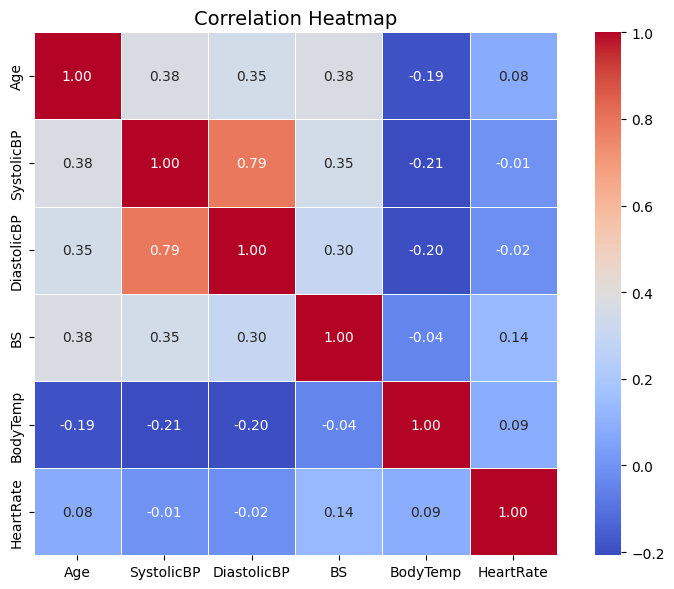

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Plot using seaborn for better visuals and annotation
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
            linewidths=0.5, square=True)
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()


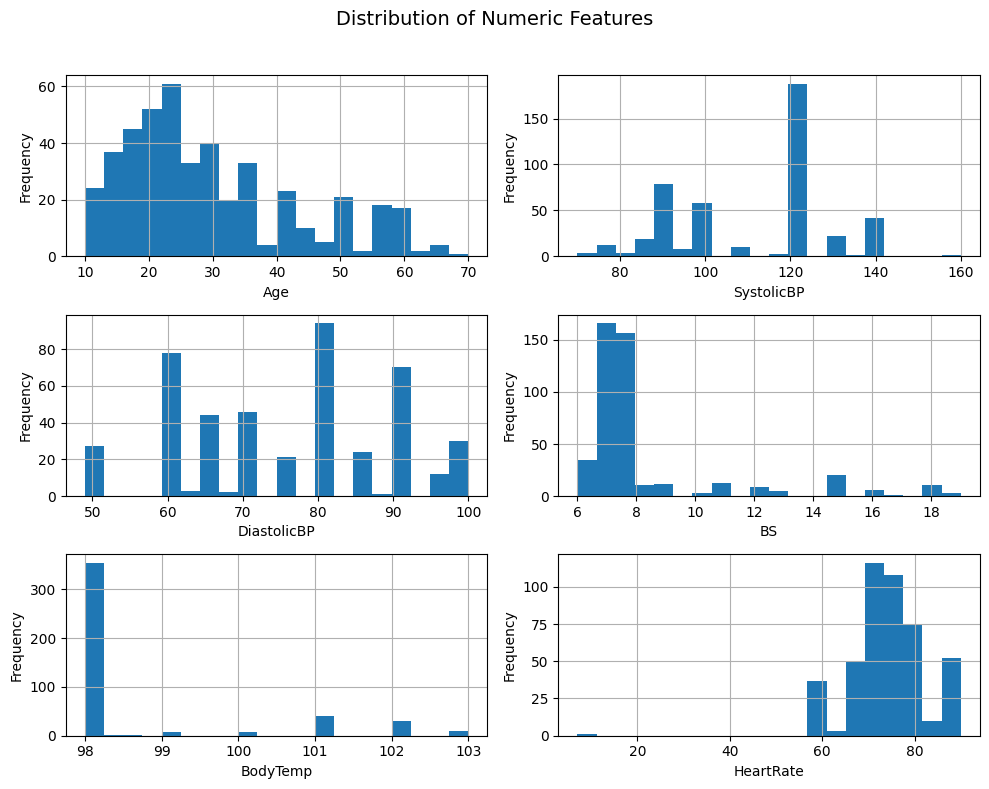

In [12]:
# Plot simple histograms for numeric columns with clear labels
axes = df.hist(figsize=(10, 8), bins=20)
plt.suptitle("Distribution of Numeric Features", fontsize=14)

# Loop through each subplot and add axis labels
for ax in axes.flatten():
    ax.set_xlabel(ax.get_title(), fontsize=10)
    ax.set_ylabel("Frequency", fontsize=10)
    ax.set_title("")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



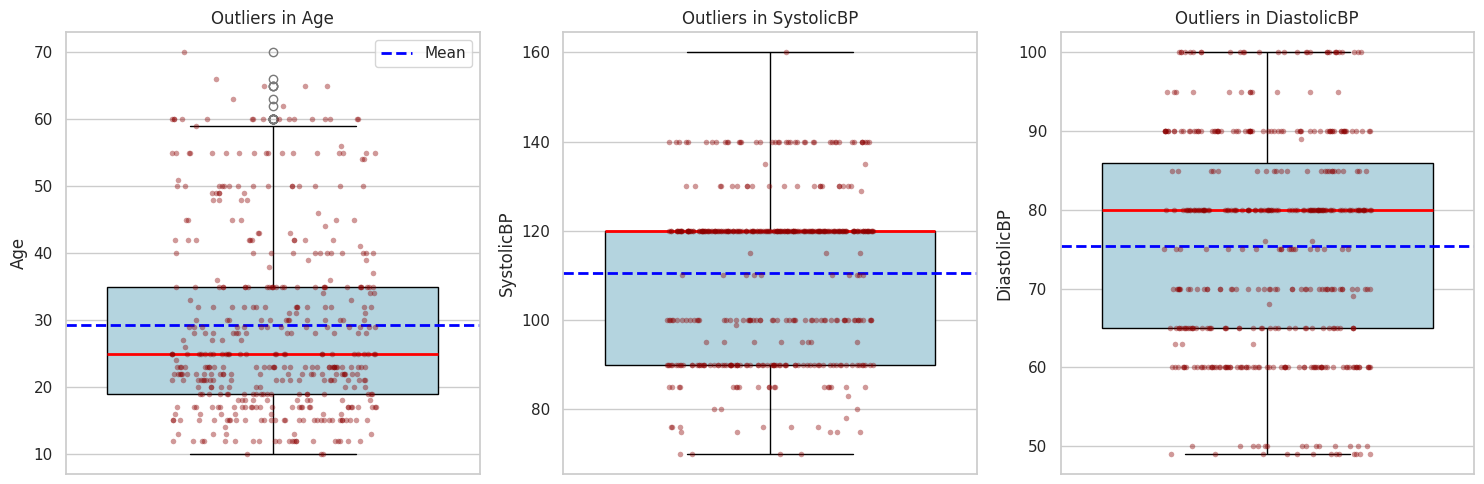

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

columns = ["Age", "SystolicBP", "DiastolicBP"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, col in zip(axes, columns):
    mean_val = df[col].mean()

    # Boxplot
    sns.boxplot(
        data=df,
        y=col,
        ax=ax,
        color="lightblue",
        medianprops=dict(color='red', linewidth=2),
        boxprops=dict(edgecolor='black'),
        whiskerprops=dict(color='black'),
        capprops=dict(color='black'),
        showfliers=True
    )

    # Stripplot
    sns.stripplot(
        data=df,
        y=col,
        ax=ax,
        color="darkred",
        alpha=0.4,
        jitter=0.25,
        size=4
    )

    # Mean line
    ax.axhline(mean_val, color='blue', linestyle='--', linewidth=2, label='Mean')

    ax.set_title(f"Outliers in {col}", fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel(col)

# Show legend only once
axes[0].legend()

plt.tight_layout()
plt.show()


/tmp/ipython-input-1350298370.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="RiskLevel", data=df, palette="Set2")


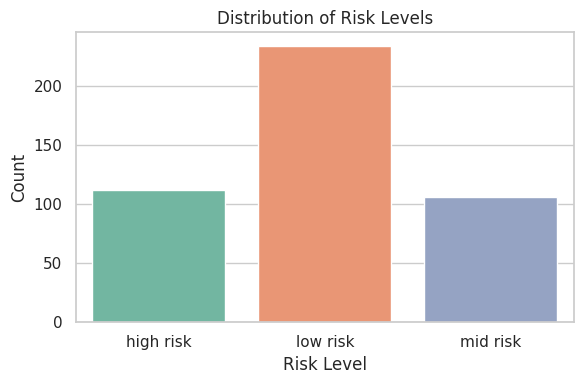

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
if "RiskLevel" in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x="RiskLevel", data=df, palette="Set2")
    plt.title("Distribution of Risk Levels")
    plt.xlabel("Risk Level")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("RiskLevel column not found in the dataset.")


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separate features and target
X = df.drop("RiskLevel", axis=1)
y = df["RiskLevel"]

# Encode RiskLevel (low/mid/high → numeric)
le = LabelEncoder()
y = le.fit_transform(y)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (361, 6)
Test shape: (91, 6)


In [16]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Apply SMOTE only on training data to balance classes
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Convert y arrays to Series for easy counting
y_train_series = pd.Series(y_train)
y_train_res_series = pd.Series(y_train_res)

print("Before SMOTE:\n", y_train_series.value_counts())
print("\nAfter SMOTE:\n", y_train_res_series.value_counts())


Before SMOTE:
 1    187
0     89
2     85
Name: count, dtype: int64

After SMOTE:
 1    187
2    187
0    187
Name: count, dtype: int64


In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit only on training data, then transform both train and test
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

print("Data scaling completed.")


Data scaling completed.


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train on SMOTE-balanced data (trees don't need scaling)
rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X_train_res, y_train_res)

# Predict on original test set
rf_pred = rf.predict(X_test)

# Report
print("Random Forest — Accuracy:", accuracy_score(y_test, rf_pred))
try:
    print(classification_report(y_test, rf_pred, target_names=le.classes_))
except NameError:
    print(classification_report(y_test, rf_pred))


Random Forest — Accuracy: 0.5494505494505495
              precision    recall  f1-score   support

   high risk       0.88      0.65      0.75        23
    low risk       0.61      0.64      0.62        47
    mid risk       0.20      0.24      0.22        21

    accuracy                           0.55        91
   macro avg       0.56      0.51      0.53        91
weighted avg       0.59      0.55      0.56        91



In [19]:
from sklearn.metrics import classification_report, accuracy_score

try:
    from xgboost import XGBClassifier

    xgb = XGBClassifier(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        reg_lambda=1.0,
        tree_method="hist"
    )
    xgb.fit(X_train_res, y_train_res)
    xgb_pred = xgb.predict(X_test)

    print("XGBoost — Accuracy:", accuracy_score(y_test, xgb_pred))
    try:
        print(classification_report(y_test, xgb_pred, target_names=le.classes_))
    except NameError:
        print(classification_report(y_test, xgb_pred))

except Exception as e:
    print("XGBoost not available:", e)
    print("Tip: pip install xgboost")


XGBoost — Accuracy: 0.5824175824175825
              precision    recall  f1-score   support

   high risk       0.88      0.65      0.75        23
    low risk       0.65      0.68      0.67        47
    mid risk       0.24      0.29      0.26        21

    accuracy                           0.58        91
   macro avg       0.59      0.54      0.56        91
weighted avg       0.62      0.58      0.59        91



In [20]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Use scaled data for SVM
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train_scaled, y_train_res)

# Predict
svm_pred = svm.predict(X_test_scaled)

# Report
print("SVM — Accuracy:", accuracy_score(y_test, svm_pred))
try:
    print(classification_report(y_test, svm_pred, target_names=le.classes_))
except NameError:
    print(classification_report(y_test, svm_pred))


SVM — Accuracy: 0.6263736263736264
              precision    recall  f1-score   support

   high risk       0.79      0.65      0.71        23
    low risk       0.67      0.79      0.73        47
    mid risk       0.29      0.24      0.26        21

    accuracy                           0.63        91
   macro avg       0.59      0.56      0.57        91
weighted avg       0.61      0.63      0.62        91



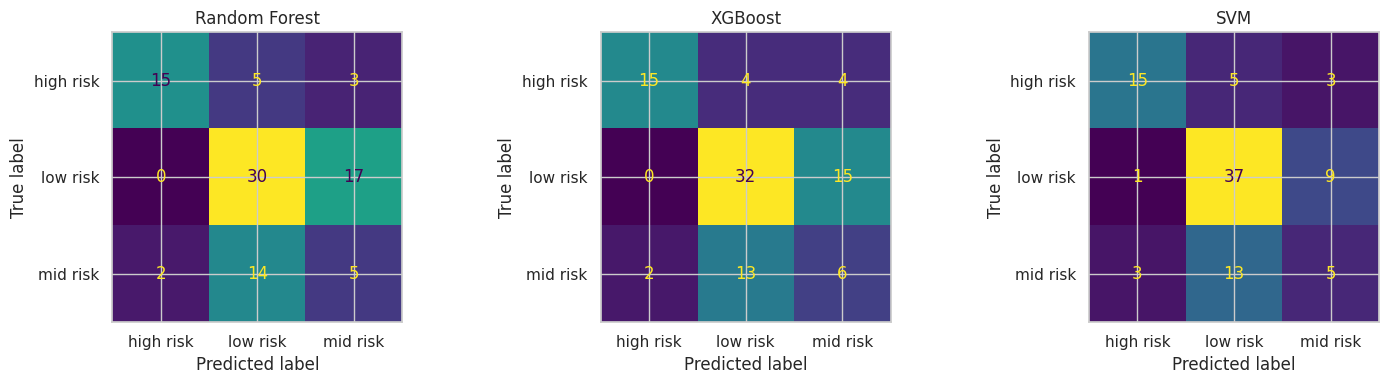

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions for all models
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
svm_pred = svm.predict(X_test_scaled)

# Create confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, pred, title in zip(
    axes,
    [rf_pred, xgb_pred, svm_pred],
    ["Random Forest", "XGBoost", "SVM"]
):
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(title)

plt.tight_layout()
plt.show()


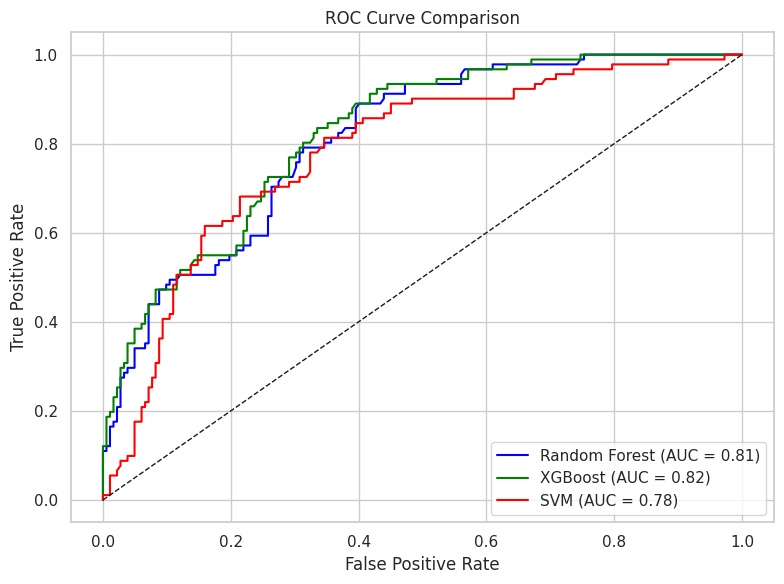

In [22]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the target for multiclass ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Get prediction probabilities (use decision_function or predict_proba)
rf_probs = rf.predict_proba(X_test)
xgb_probs = xgb.predict_proba(X_test)
svm_probs = svm.decision_function(X_test_scaled)

# Plot ROC curves for each model
plt.figure(figsize=(8, 6))

for probs, name, color in zip(
    [rf_probs, xgb_probs, svm_probs],
    ["Random Forest", "XGBoost", "SVM"],
    ["blue", "green", "red"]
):
    # Compute ROC for each class and average
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), probs.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions={
        "n_estimators": [200, 400, 600, 800],
        "max_depth": [None, 5, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": ["sqrt", "log2", None],
        "bootstrap": [True, False],
    },
    n_iter=20,
    scoring="f1_macro",
    cv=cv,
    verbose=0,
    random_state=42,
    n_jobs=-1
)

# Use SMOTE-balanced training data (X_train_res, y_train_res)
rf_search.fit(X_train_res, y_train_res)

print("Best RF params:", rf_search.best_params_)
rf_best = rf_search.best_estimator_

# Predict on test data
rf_pred = rf_best.predict(X_test)

# Print best hyperparameters
print("Best Random Forest Parameters:")
print(rf_search.best_params_)

# Classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))


Best RF params: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Best Random Forest Parameters:
{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.65      0.75        23
           1       0.62      0.66      0.64        47
           2       0.21      0.24      0.22        21

    accuracy                           0.56        91
   macro avg       0.57      0.52      0.54        91
weighted avg       0.59      0.56      0.57        91



In [24]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

try:
    from xgboost import XGBClassifier

    xgb = XGBClassifier(
        objective="multi:softprob",
        num_class=len(np.unique(y_train_res)),
        random_state=42,
        n_jobs=-1,
        tree_method="hist",
        eval_metric="mlogloss"
    )

    xgb_search = RandomizedSearchCV(
        estimator=xgb,
        param_distributions={
            "learning_rate": [0.01, 0.05, 0.1],
            "n_estimators": [200, 400, 800],
            "max_depth": [3, 5, 7],
            "subsample": [0.7, 0.9, 1.0],
            "colsample_bytree": [0.7, 0.9, 1.0],
            "reg_lambda": [0.0, 1.0, 2.0],
            "min_child_weight": [1, 3, 5],
        },
        n_iter=20,
        scoring="f1_macro",
        cv=cv,
        verbose=1,
        random_state=42,
        n_jobs=-1
    )

    # Fit on SMOTE-balanced training data
    xgb_search.fit(X_train_res, y_train_res)

    # Print best parameters
    print("Best XGBoost Parameters:")
    print(xgb_search.best_params_)

    # Best estimator + prediction
    xgb_best = xgb_search.best_estimator_
    xgb_pred = xgb_best.predict(X_test)

    # Classification report
    print("\nXGBoost Classification Report:")
    print(classification_report(y_test, xgb_pred))

except Exception as e:
    print("XGBoost tuning failed. Reason:", e)
    print("Tip: make sure 'xgboost' is installed (pip install xgboost)")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best XGBoost Parameters:
{'subsample': 1.0, 'reg_lambda': 1.0, 'n_estimators': 800, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.9}

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.65      0.75        23
           1       0.65      0.79      0.71        47
           2       0.24      0.19      0.21        21

    accuracy                           0.62        91
   macro avg       0.59      0.54      0.56        91
weighted avg       0.61      0.62      0.61        91



In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svm = SVC(probability=True, random_state=42)

svm_grid = GridSearchCV(
    estimator=svm,
    param_grid={
        "kernel": ["rbf", "linear"],
        "C": [0.1, 1, 10, 100],
        "gamma": ["scale", 0.01, 0.001, 0.1]  # ignored for linear but harmless
    },
    scoring="f1_macro",
    cv=cv,
    verbose=0,
    n_jobs=-1
)

# Use scaled, SMOTE-balanced training data (X_train_scaled, y_train_res)
svm_grid.fit(X_train_scaled, y_train_res)

print("Best SVM params:", svm_grid.best_params_)
svm_best = svm_grid.best_estimator_

svm_pred = svm_best.predict(X_test_scaled)
# Prediction already done
# svm_pred = svm_best.predict(X_test_scaled)

print("\nSVM Classification Report:")
print(classification_report(y_test, svm_pred))



Best SVM params: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.65      0.71        23
           1       0.64      0.68      0.66        47
           2       0.23      0.24      0.23        21

    accuracy                           0.57        91
   macro avg       0.55      0.52      0.54        91
weighted avg       0.58      0.57      0.57        91

